<h1><i>E. coli</i> Co-evolution simulation </h1>
<h2> Using Dynamic Parallel FBA (dpFBA)

<h4>Following the settings and results from Zhang and Reed<sup>1</sup></h4>

In [39]:
import numpy
import matplotlib.pyplot as plt
from dcFBA.DynamicModels import DynamicParallelFBA

from ecoli_models import (
    get_leucine_knock_out_model,
    get_lysine_knock_out_model,
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
leucine_knock_out = get_leucine_knock_out_model()
lysine_knock_out = get_lysine_knock_out_model()

getState1
Model clone time: 2.463449001312256
getState1
Model clone time: 2.1947920322418213


<H2> Constrain the release rates </H2>

<p> Here we do not constrain the leucine and lysine exchanges

In [41]:
#Set creation of the metabolites to zero
leucine_knock_out.getReaction("R_IPPS").setUpperBound(0)
lysine_knock_out.getReaction("R_DAPDC").setUpperBound(0)

#Restrict the release of glucose
leucine_knock_out.getReaction("R_GLCtex_copy1").setUpperBound(10)
leucine_knock_out.getReaction("R_GLCtex_copy2").setUpperBound(0)

lysine_knock_out.getReaction("R_GLCtex_copy1").setUpperBound(10)
lysine_knock_out.getReaction("R_GLCtex_copy2").setUpperBound(0)

#constrain release
leucine_knock_out.getReaction("R_LEUtex").setLowerBound(-1000)
leucine_knock_out.getReaction("R_LEUtex").setUpperBound(1000)
leucine_knock_out.getReaction("R_LYStex").setLowerBound(-0.056)
leucine_knock_out.getReaction("R_LYStex").setUpperBound(-0.056)

#constrain release
lysine_knock_out.getReaction("R_LYStex").setLowerBound(-1000)
lysine_knock_out.getReaction("R_LYStex").setUpperBound(1000)
lysine_knock_out.getReaction("R_LEUtex").setLowerBound(-0.086)
lysine_knock_out.getReaction("R_LEUtex").setUpperBound(-0.086)



#R_FE3tex settings from paper
leucine_knock_out.getReaction("R_FE3tex").setUpperBound(0)
lysine_knock_out.getReaction("R_FE3tex").setUpperBound(0)

leucine_knock_out.getReaction("R_O2tex").setLowerBound(-15)
lysine_knock_out.getReaction("R_O2tex").setLowerBound(-15)

leucine_knock_out.getReaction("R_EX_o2_e").setLowerBound(-30) #could also be set to 2* 18.5

lysine_knock_out.getReaction("R_EX_o2_e").setLowerBound(-30) #could also be set to 2* 18.5



In [42]:
leucine_knock_out.setId("dleu")
lysine_knock_out.setId("dlys")

In [43]:
dpFBA = DynamicParallelFBA([leucine_knock_out, lysine_knock_out], [0.0027, 0.0027],  {"M_glc__D_e": 11.96 , "M_leu__L_e": 0.0086 * 0.0027, "M_lys__L_e": 0.0027 * 0.0056},)

getState1
Model clone time: 2.3685379028320312
getState1
Model clone time: 2.0381991863250732


In [44]:
def stop (sim, used_time, run_condition):
    if sim.biomasses["dleu"][-1] + sim.biomasses["dlys"][-1] >= 0.083:
        #Stop the simulation by setting community reaction to zero, solution will be zero or nan
        sim.models["dleu"].getReaction("R_BIOMASS_Ec_iAF1260_core_59p81M").setUpperBound(0)
        sim.models["dlys"].getReaction("R_BIOMASS_Ec_iAF1260_core_59p81M").setUpperBound(0)
    return 0

In [45]:
dpFBA.simulate(0.1,epsilon=0.0001,deviate=stop)

Updating gene activity network ... done.

cplx_constructLPfromFBA time: 0.04804491996765137

Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
LP Presolve eliminated 423 rows and 761 columns.
Aggregator did 1025 substitutions.
Reduced LP has 220 rows, 596 columns, and 3070 nonzeros.
Presolve time = 0.01 sec. (3.81 ticks)
Initializing dual steep norms . . .

Iteration log . . .
Iteration:     1   Dual objective     =             0.000515
Perturbation started.
Iteration:    51   Dual objective     =             0.000515
Iteration:   113   Dual objective     =             0.000515
Removing perturbation.
Iteration:   137   Dual objective     =             0.000515
Solution available (status=optimal) type: 1
Solution available (status=optimal) type: 1
Updating gene activity network ... done.

cplx_constructLPfromFBA time: 0.20435380935668945

Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
CPXPARAM_Read_Da

In [62]:
# Uncomment code if you do not want to wait half an hour instead of running the simulation

# import pickle

# with open("../../output/dpFBA/dpFBA_release_constrained.pkl", "rb") as file:
#     dpFBA = pickle.load(file)


getState1
getState1


In [46]:
biomasses = dpFBA.get_biomasses()
metabolites = dpFBA.get_metabolites()
time_points = dpFBA.get_time_points()


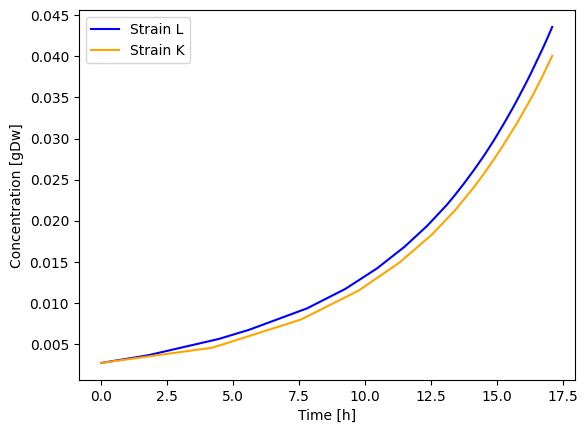

In [47]:
plt.plot(time_points, biomasses["dleu"], color="blue", label="Strain L")
plt.plot(time_points, biomasses["dlys"], color="orange", label="Strain K")

plt.xlabel("Time [h]")
plt.ylabel("Concentration [gDw]")
plt.legend()
plt.show()

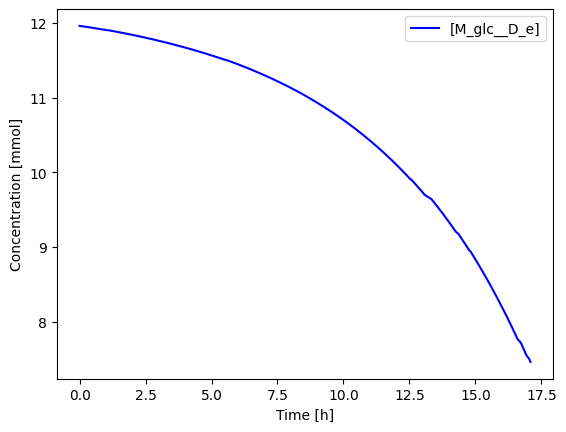

In [49]:
plt.plot(time_points, metabolites["M_glc__D_e"], color="blue", label="[M_glc__D_e]")
plt.xlabel("Time [h]")
plt.ylabel("Concentration [mmol]")
# Adding legend
plt.legend()
plt.show()

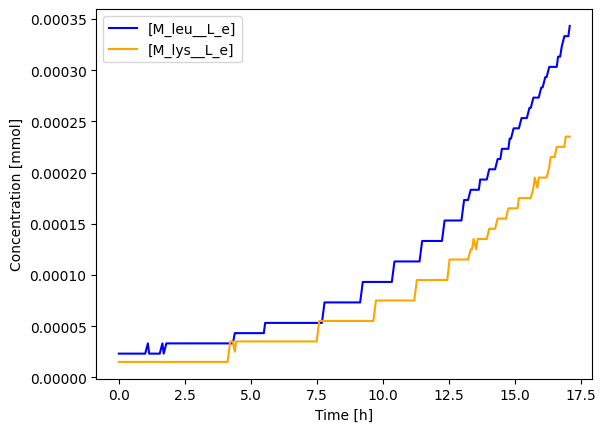

In [50]:
plt.plot(time_points, metabolites["M_leu__L_e"], color="blue", label="[M_leu__L_e]")
plt.plot(time_points, metabolites["M_lys__L_e"], color="orange", label="[M_lys__L_e]")

plt.xlabel("Time [h]")
plt.ylabel("Concentration [mmol]")
# Adding legend
plt.legend()
plt.show()

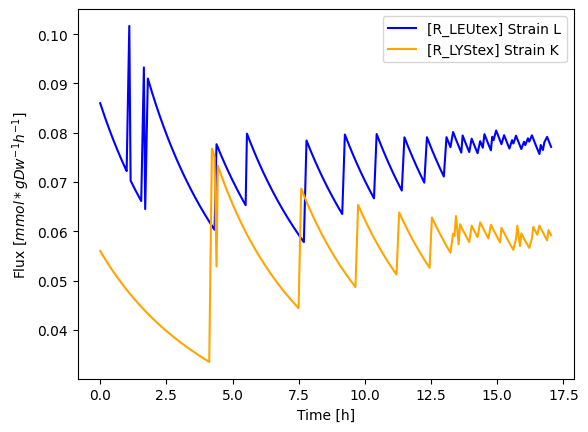

In [51]:
ls1 = dpFBA.get_specific_flux_values("dleu", "R_LEUtex")
ls2 = dpFBA.get_specific_flux_values("dlys", "R_LYStex")

plt.plot(time_points[:-1], ls1, color="blue", label=f"[R_LEUtex] Strain L")
plt.plot(time_points[:-1], ls2, color="orange", label=f"[R_LYStex] Strain K")

plt.legend()
plt.xlabel("Time [h]")
plt.ylabel(r'Flux [$mmol * gDw^{-1} h^{-1}$]')
plt.show()

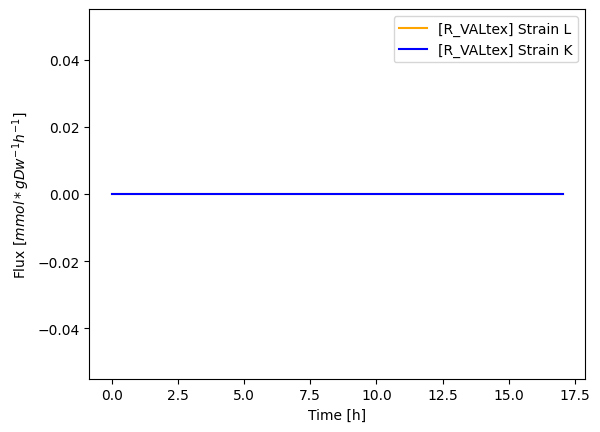

In [53]:
ls1 = dpFBA.get_specific_flux_values("dleu", "R_VALtex")
ls2 = dpFBA.get_specific_flux_values("dlys", "R_VALtex")

plt.plot(time_points[:-1], ls1, color="orange", label=f"[R_VALtex] Strain L")
plt.plot(time_points[:-1], ls2, color="blue", label=f"[R_VALtex] Strain K")

plt.legend()
plt.xlabel("Time [h]")
plt.ylabel(r'Flux [$mmol * gDw^{-1} h^{-1}$]')
plt.show()

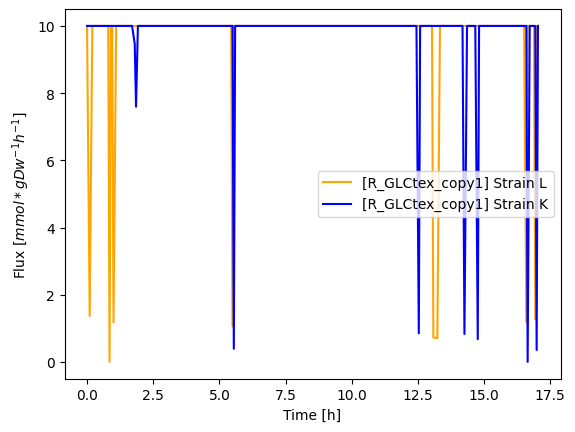

In [54]:
ls1 = dpFBA.get_specific_flux_values("dleu", "R_GLCtex_copy1")
ls2 = dpFBA.get_specific_flux_values("dlys", "R_GLCtex_copy1")

plt.plot(time_points[:-1], ls1, color="orange", label=f"[R_GLCtex_copy1] Strain L")
plt.plot(time_points[:-1], ls2, color="blue", label=f"[R_GLCtex_copy1] Strain K")

plt.legend()
plt.xlabel("Time [h]")
plt.ylabel(r'Flux [$mmol * gDw^{-1} h^{-1}$]')
plt.show()


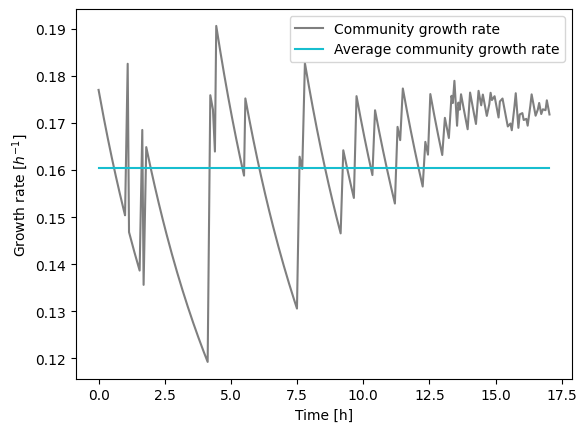

0.16047025946702276


In [60]:
biomass_flux_dleu = dpFBA.get_flux_values("dleu", "R_BIOMASS_Ec_iAF1260_core_59p81M")
biomass_flux_dlys = dpFBA.get_flux_values("dlys", "R_BIOMASS_Ec_iAF1260_core_59p81M")
xcomm = []

for i,bm in enumerate(biomass_flux_dleu):
    xcomm.append((bm + biomass_flux_dlys[i]) / (biomasses["dleu"][i] + biomasses["dlys"][i]) )


plt.plot(time_points[:-1], xcomm, color=f"C{17}", label=f"Community growth rate")
plt.plot(time_points[:-1], [sum(xcomm)/len(xcomm)] * len(xcomm), color=f"C{19}", label=f"Average community growth rate")

plt.xlabel("Time [h]")
plt.ylabel(r'Growth rate [$h^{-1}$]')
plt.legend()


plt.show()


print(sum(xcomm)/len(xcomm))

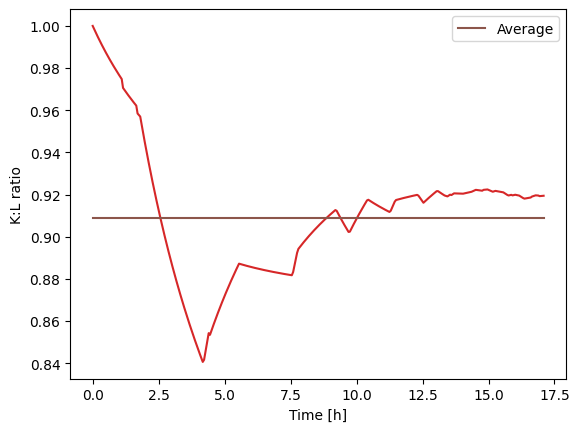

0.9194208848591455


In [59]:
fls = [ v / biomasses["dleu"][t+1] for t,v in enumerate(biomasses["dlys"][1:])]
plt.plot(time_points, [1]+fls, color=f"C{3}")
plt.plot(time_points, [sum(fls)/len(fls)] *(len(time_points)), color=f"C{5}", label=f"Average")
plt.xlabel("Time [h]")
plt.ylabel("K:L ratio")
plt.legend()


plt.show()

print(fls[-1])



<sup>1</sup>Zhang, X. and Reed, J. L. (2014). Adaptive evolution of synthetic cooperating
communities improves growth performance. PLoS ONE, 9(10):e108297. https://doi.org/10.1371/journal.pone.0108297
